In [1]:
import mido
import matplotlib

In [2]:
import numpy as np

#### Standard MIDI File Structure    

A standard MIDI file consists of three main components:

1. Header Chunk: This provides metadata about the file.Chunk Type: 4 bytes, always "MThd".
   - Length: 4 bytes, always 6 (the length of the header data).|
   - Format Type: 2 bytes, indicating the file format (0, 1, or 2).
   - Number of Tracks: 2 bytes, indicating the number of track chunks in the file.
   - Time Division: 2 bytes, indicating the timing information (ticks per quarter note or frames per second).    
   

2. Track Chunk(s): Each track contains a sequence of MIDI events.
   - Chunk Type: 4 bytes, always "MTrk".
   - Length: 4 bytes, indicating the length of the track data.
   - Track Event Data: Variable length, consisting of MIDI events such as note on/off, control changes, and meta events.

In [197]:
path = '/home/sara/Scaricati/allemande_fifth_fragment.midi'

In [198]:
# Open the MIDI file
midi_file = mido.MidiFile(path)

# Print header information
print(f"Type: {midi_file.type}")
print(f"Tracks: {len(midi_file.tracks)}")
print(f"Ticks per beat: {midi_file.ticks_per_beat}")

t=0
# Iterate through each track and print events
for i, track in enumerate(midi_file.tracks):
    print(f"\nTrack {i}: {track.name}")
    for msg in track:
        print(msg)
        t = t + msg.time

Type: 1
Tracks: 2
Ticks per beat: 960

Track 0: 
program_change channel=0 program=74 time=0
MetaMessage('set_tempo', tempo=1000000, time=0)
MetaMessage('end_of_track', time=0)

Track 1: MIDI TRACK
MetaMessage('track_name', name='MIDI TRACK', time=0)
note_on channel=0 note=88 velocity=20 time=144
note_off channel=0 note=88 velocity=20 time=144
note_on channel=0 note=85 velocity=20 time=0
note_off channel=0 note=85 velocity=20 time=144
note_on channel=0 note=79 velocity=20 time=0
note_off channel=0 note=79 velocity=20 time=144
note_on channel=0 note=78 velocity=20 time=0
note_off channel=0 note=78 velocity=20 time=144
note_on channel=0 note=86 velocity=20 time=0
note_off channel=0 note=86 velocity=20 time=144
note_on channel=0 note=83 velocity=20 time=0
note_off channel=0 note=83 velocity=20 time=144
note_on channel=0 note=77 velocity=20 time=0
note_off channel=0 note=77 velocity=20 time=144
note_on channel=0 note=76 velocity=20 time=0
note_off channel=0 note=76 velocity=20 time=144
note

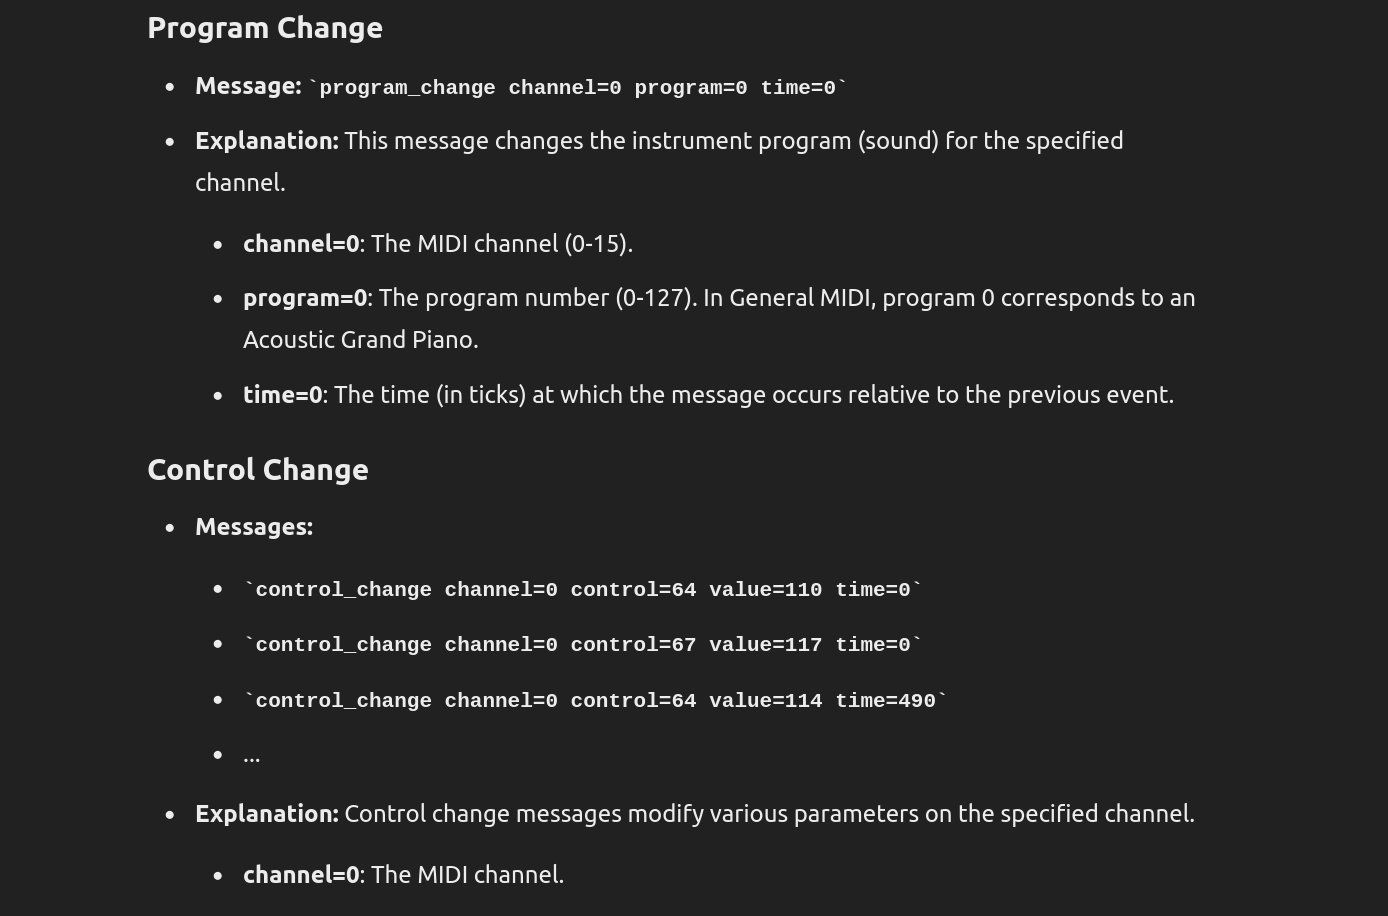
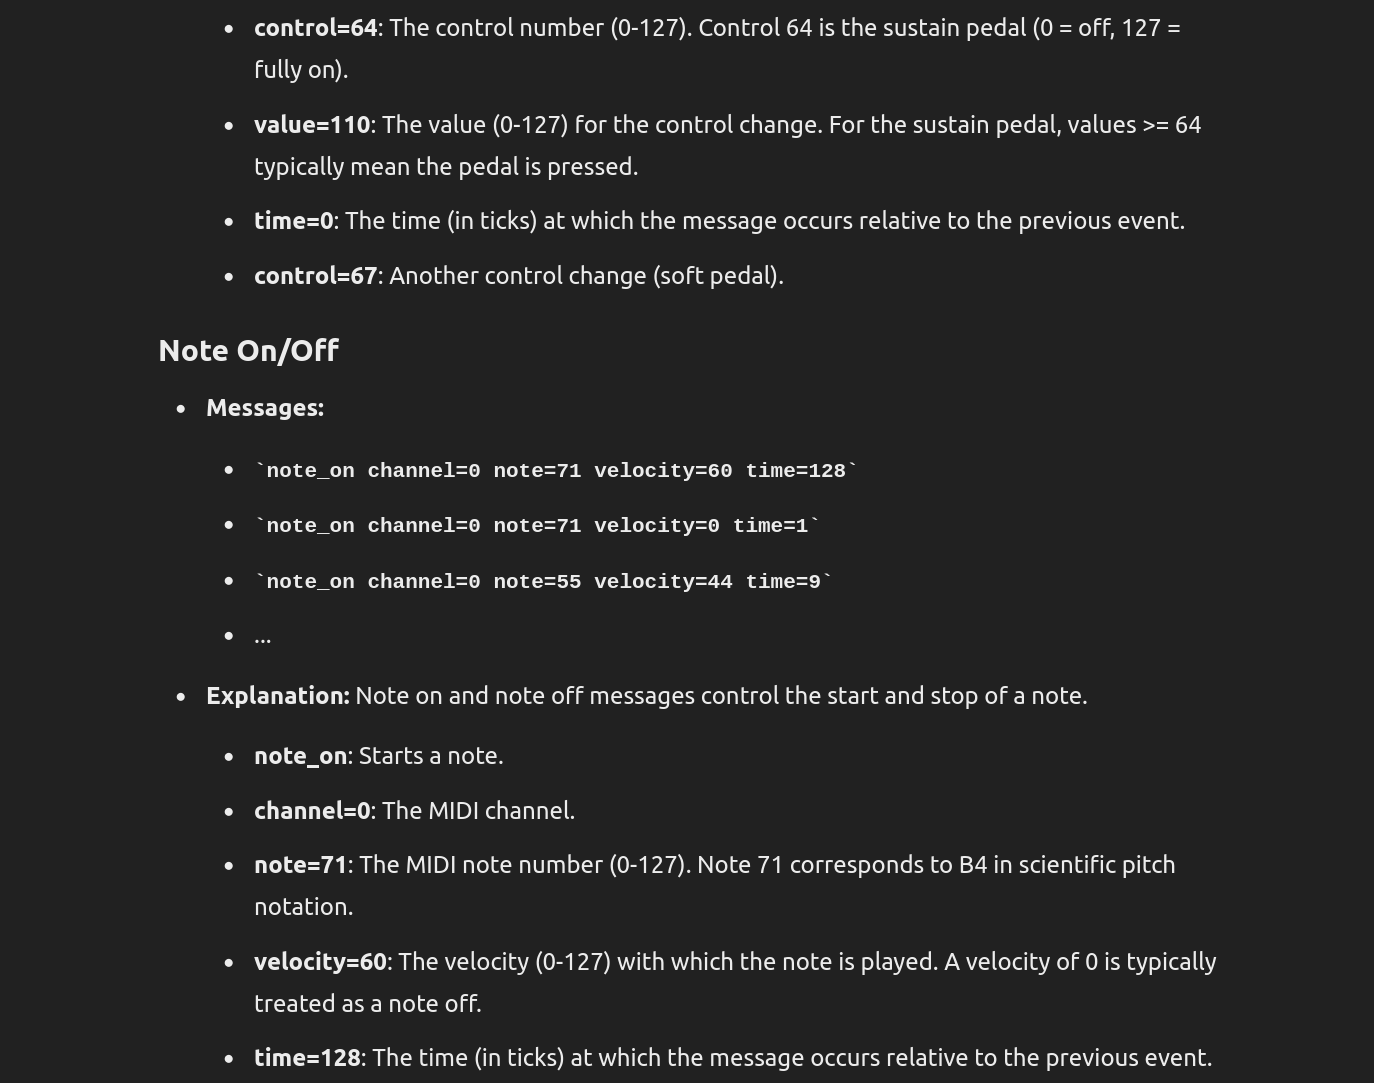

In [12]:
#credo che quindi a noi interessa solo i messaggi di 'note_on'con il valore della nota e il tempo?

In [199]:
# Function to read MIDI file and extract note events in ticks
def extract_note_events(midi_file_path, track_num):
    midi_file = mido.MidiFile(midi_file_path)
    events = []
    current_time = 0

    for i, track in enumerate(midi_file.tracks):
        if i == track_num:
            for msg in track:
                current_time += msg.time
                if msg.type == 'note_on' and msg.velocity > 0:
                    events.append([int(current_time), int(msg.note), 1])   #1: note on
                elif msg.type == 'note_off' or (msg.type == 'note_on' and msg.velocity == 0):
                    events.append([int(current_time), int(msg.note), 0])  #0: note off
    return events,current_time

In [200]:
notes,max_time = extract_note_events(path,1)

In [211]:
max_time/8

1728.0

In [201]:
notes = np.array(notes)  #Array with: [time(in ticks) from the start, note, indicator of note on or off]
notes

array([[  144,    88,     1],
       [  288,    88,     0],
       [  288,    85,     1],
       [  432,    85,     0],
       [  432,    79,     1],
       [  576,    79,     0],
       [  576,    78,     1],
       [  720,    78,     0],
       [  720,    86,     1],
       [  864,    86,     0],
       [  864,    83,     1],
       [ 1008,    83,     0],
       [ 1008,    77,     1],
       [ 1152,    77,     0],
       [ 1152,    76,     1],
       [ 1296,    76,     0],
       [ 1296,    84,     1],
       [ 1440,    84,     0],
       [ 1440,    81,     1],
       [ 1584,    81,     0],
       [ 1584,    75,     1],
       [ 1728,    75,     0],
       [ 1728,    74,     1],
       [ 1872,    74,     0],
       [ 1872,    82,     1],
       [ 2016,    82,     0],
       [ 2016,    80,     1],
       [ 2160,    80,     0],
       [ 2160,    74,     1],
       [ 2304,    74,     0],
       [ 2304,    72,     1],
       [ 2448,    72,     0],
       [ 2448,    81,     1],
       [ 2

In [202]:
notes_unpacked = np.zeros((max_time,))
notes_unpacked[0:min(notes[:,0])] = 0 #if there is silence at the start

for i in range(0,(notes.shape[0]-1)):
    if(notes[i,2]==1):
        #print('note on:  ', notes[i,1])
        notes_unpacked[notes[i,0]:notes[i+1,0]] = notes[i,1]  #fill every time tick with that note
    else:
        notes_unpacked[notes[i,0]:notes[i+1,0]] = 0           #if note off, silence until next note

In [205]:
notes_unpacked[289:432]

array([85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.,
       85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85., 85.])

In [172]:
#now we have notes_unpacked with a note for each time tick
#Let's divide into bars

In [206]:
note_length = 144

In [214]:
bar_length = int(max_time/8)
notes_per_bar = bar_length/note_length  # w
notes_per_bar

12.0

In [215]:
bars = [] 

for j in range(0,(notes_unpacked.shape[0]-1),bar_length):
    bars.append(notes_unpacked[j:j+bar_length])
    

In [174]:
bars

[array([ 0.,  0.,  0., ..., 33., 33., 33.]),
 array([33., 33., 33., ..., 27., 27., 27.]),
 array([27., 27., 27., ..., 44., 44., 44.]),
 array([44., 44., 44., ...,  0.,  0.,  0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 0.,  0.,  0., ..., 84., 84., 84.]),
 array([84., 84., 84., ...,  0.,  0.,  0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 0.,  0.,  0., ..., 52., 58., 58.]),
 array([58., 58., 58., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ..., 68., 68., 68.]),
 array([68., 68., 68., ...,  0.,  0.,  0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 arr

In [220]:
len(bars)   # Numero di barre

8

In [221]:
len(bars[1])  # ticks in una barra

1728

In [222]:
12*144

1728

## [0,1] matrix encoding

In [125]:
#now we work on the bars, dividing each bar into sixteen timesteps: for each timestep, the longest note in that
#timestep is assigned to the whole step

In [223]:
from collections import Counter

#def remove_zeros(arr):
    #return [num for num in arr if num != 0]

def most_frequent(arr):
    # Count the frequency of each number in the array
    counter = Counter(arr)
    
    # Find the number with the highest frequency
    most_common = counter.most_common(1)
    
    # Return the most frequent number
    return most_common[0][0] if most_common else None


In [224]:
n_bars = len(bars)
note_bars = np.zeros((int(n_bars),int(notes_per_bar),128))
note_bars_list = []

for i in range(0,len(bars)):
    bar = bars[i]
    notes_list = [] 
    for t,j in enumerate(range(1,len(bar)-1,note_length)):
        timestep_bar = bar[j:j+note_length]
        note = most_frequent(timestep_bar)   #most frequent note in the timestep, ignoring silence
        
        notes_list.append(note)
        
        if note!=None :
            note_bars[i,t,int(note)] = 1  #assign one to the corresponding note 
    note_bars_list.append(notes_list)

In [225]:
note_bars

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [226]:
note_bars_list

[[0.0, 88.0, 85.0, 79.0, 78.0, 86.0, 83.0, 77.0, 76.0, 84.0, 81.0, 75.0],
 [74.0, 82.0, 80.0, 74.0, 72.0, 81.0, 77.0, 74.0, 71.0, 77.0, 74.0, 71.0],
 [68.0, 71.0, 74.0, 77.0, 76.0, 74.0, 72.0, 71.0, 72.0, 76.0, 81.0, 72.0],
 [71.0, 69.0, 64.0, 80.0, 81.0, 69.0, 67.0, 64.0, 65.0, 81.0, 64.0, 79.0],
 [62.0, 77.0, 76.0, 73.0, 74.0, 82.0, 72.0, 81.0, 80.0, 76.0, 74.0, 71.0],
 [72.0, 88.0, 71.0, 86.0, 72.0, 84.0, 74.0, 83.0, 76.0, 81.0, 83.0, 80.0],
 [81.0, 64.0, 69.0, 72.0, 76.0, 69.0, 72.0, 76.0, 81.0, 76.0, 81.0, 84.0],
 [88.0, 81.0, 84.0, 88.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0]]

In [227]:
note_bars.shape

(8, 12, 128)

## Bytes encoding

In [250]:
n_bars = len(bars)
note_bars_byte = np.zeros((int(n_bars),int(notes_per_bar),8))


for i in range(0,len(bars)):
    bar = bars[i]
    notes_list = [] 
    for t,j in enumerate(range(1,len(bar)-1,note_length)):
        timestep_bar = bar[j:j+note_length]
        note = most_frequent(timestep_bar)   #most frequent note in the timestep, ignoring silence
        
        if note!=None :
            note_bars_byte[i,t,:] = np.unpackbits(bytearray(bytes([int(note)])))  #assign one to the corresponding note 

In [251]:
note_bars_byte[0,11,:]

array([0., 1., 0., 0., 1., 0., 1., 1.])

In [253]:
note_bars_byte.shape

(8, 12, 8)